<a href="https://colab.research.google.com/github/mghendi/opencvcartoonify/blob/main/Group_3_CV_Cartoonify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 3 OpenCV Cartoonify

## Group Members



1.   Peter Kariuki Mutuura - P52/37710/2020
2.   Josech Mayaka Nyakundi - P52/37684/2020
3.   Samuel Mwamburi Mghendi - P52/37621/2020


### OpenCV Data Types, Matrices, Images and More Programs.


## Cartoonify an Image with OpenCV in Python

In [ ]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

#### The above code opens the file box, i.e the pop-up box to choose the file from the device, 
#### which opens every time you run the code. fileopenbox() is the method in easyGUI module which returns 
#### the path of the chosen file as a string.

In [ ]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

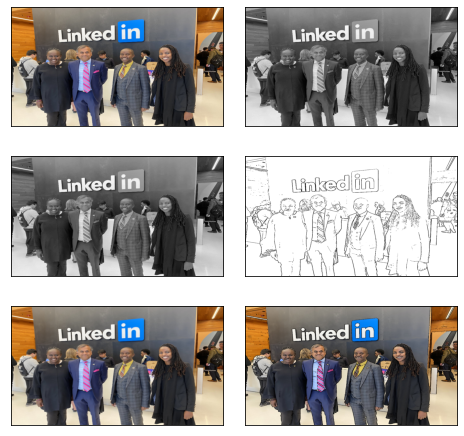

In [ ]:

def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')


    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')


    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')

    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')

    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')


    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()
    
    
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()



